In [23]:
import numpy as np
import os
from neural_network import RedNeuronal
from image_processor import ImageProcessor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import json

In [45]:
def plot_training_history(training_history):
    """Graficar historial de entrenamiento"""
    try:
        if not training_history:
            print("⚠️  No hay historial de entrenamiento para graficar")
            return
            
        epochs = range(1, len(training_history) + 1)
        losses = [item[0] for item in training_history]
        accuracies = [item[1] for item in training_history]
        
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
        
        ax1.plot(epochs, losses)
        ax1.set_title('Pérdida durante el entrenamiento')
        ax1.set_xlabel('Epoch')
        ax1.set_ylabel('Loss')
        ax1.grid(True)
        ax1.axhline(y=0.693, color='r', linestyle='--', label='Azar (ln(2))')
        ax1.legend()
        
        ax2.plot(epochs, accuracies)
        ax2.set_title('Precisión durante el entrenamiento')
        ax2.set_xlabel('Epoch')
        ax2.set_ylabel('Accuracy')
        ax2.grid(True)
        ax2.axhline(y=0.5, color='r', linestyle='--', label='Azar (50%)')
        ax2.legend()
        
        plt.tight_layout()
        plt.show()
        
    except Exception as e:
        print(f"⚠️  No se pudo generar la gráfica: {e}")

def main():
    print("=== Entrenamiento CORREGIDO - Red Neuronal ===\n")
    
    # ✅ CONFIGURACIÓN CORREGIDA
    TARGET_SIZE = (600, 800)  # ← REDUCIDO para menos parámetros
    EPOCHS = 100
    LEARNING_RATE = 0.01      # ← AUMENTADO 10x
    BATCH_SIZE = 4            # ← REDUCIDO para mejor gradiente
    
    print(f"🔧 Configuración corregida:")
    print(f"   - Tamaño imagen: {TARGET_SIZE} (en lugar de 600x800)")
    print(f"   - Learning rate: {LEARNING_RATE} (en lugar de 0.001)")
    print(f"   - Batch size: {BATCH_SIZE} (en lugar de 8)")
    print()
    
    # Inicializar procesador de imágenes
    processor = ImageProcessor(target_size=TARGET_SIZE)
    
    # Verificar existencia del dataset
    dataset_path = "dataset"
    if not os.path.exists(dataset_path):
        print("❌ No se encontró la carpeta 'dataset'.")
        return
    
    try:
        # Cargar y procesar dataset
        print("📁 Cargando dataset...")
        X, y, class_names = processor.create_dataset_from_folder(dataset_path)
        
        if len(X) == 0:
            print("❌ No se encontraron imágenes en el dataset.")
            return
        
        print(f"✅ Dataset cargado:")
        print(f"   - {len(X)} imágenes")
        print(f"   - {len(class_names)} clases: {class_names}")
        print(f"   - Tamaño de entrada: {X.shape[1]} píxeles")
        
        # ⚠️ VERIFICAR TAMAÑO DEL DATASET
        images_per_class = len(X) // len(class_names)
        print(f"   - Promedio por clase: ~{images_per_class} imágenes")
        
        if images_per_class < 20:
            print("⚠️  ADVERTENCIA: Muy pocas imágenes por clase!")
            print("💡 Recomendación: Al menos 50 imágenes por clase")
        print()
        
        # División de datos
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42, stratify=y
        )
        
        print(f"📊 División del dataset:")
        print(f"   - Entrenamiento: {len(X_train)} imágenes")
        print(f"   - Prueba: {len(X_test)} imágenes")
        
        if len(X_train) < 20:
            print("⚠️  ADVERTENCIA: Muy pocas imágenes de entrenamiento!")
        print()
        
        # ✅ ARQUITECTURA SIMPLIFICADA
        n_classes = len(class_names)
        input_size = X.shape[1]
        
        # Arquitectura MÁS SIMPLE para pocos datos
        architecture = [
            (input_size, 'input'),      # Capa de entrada
            (64, 'relu'),               # ← REDUCIDO de 256 a 64
            (32, 'relu'),               # ← REDUCIDO de 128 a 32
            (n_classes, 'softmax')      # Capa de salida
        ]
        
        print(f"🧠 Arquitectura SIMPLIFICADA:")
        for i, (neurons, activation) in enumerate(architecture):
            if i == 0:
                layer_type = "Entrada"
            elif i == len(architecture) - 1:
                layer_type = "Salida"
            else:
                layer_type = f"Oculta {i}"
            print(f"   - Capa {layer_type}: {neurons} neuronas ({activation})")
        print()
        
        # Entrenamiento
        print("🚀 Iniciando entrenamiento CORREGIDO...")
        red = RedNeuronal(architecture)
        
        # ✅ MOSTRAR PROGRESO CADA 5 EPOCHS
        print("📊 Monitoreando progreso cada 5 epochs...")
        print()
        
        # Modificar temporalmente para mostrar más progreso
        original_train = red.train
        def verbose_train(X, y, epochs, learning_rate, batch_size, verbose=True):
            return original_train(X, y, epochs, learning_rate, batch_size, verbose=True)
        
        red.train = verbose_train
        
        red.train(
            X_train, y_train,
            epochs=EPOCHS,
            learning_rate=LEARNING_RATE,
            batch_size=BATCH_SIZE,
            verbose=True
        )
        
        print("\n✅ Entrenamiento completado!\n")
        
        # Evaluación
        print("📈 Evaluando modelo...")
        train_loss, train_accuracy = red.evaluate(X_train, y_train)
        test_loss, test_accuracy = red.evaluate(X_test, y_test)
        
        print(f"📊 Resultados finales:")
        print(f"   - Precisión en entrenamiento: {train_accuracy:.4f} ({train_accuracy*100:.2f}%)")
        print(f"   - Precisión en prueba: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
        print(f"   - Pérdida en entrenamiento: {train_loss:.4f}")
        print(f"   - Pérdida en prueba: {test_loss:.4f}")
        
        # ✅ DIAGNÓSTICO DE RESULTADOS
        print(f"\n🔍 Diagnóstico:")
        if test_loss > 0.65:
            print("❌ Pérdida muy alta - El modelo no está aprendiendo bien")
        elif test_loss < 0.3:
            print("✅ Pérdida buena - El modelo está aprendiendo")
        else:
            print("⚠️  Pérdida moderada - Mejora posible")
            
        if test_accuracy < 0.6:
            print("❌ Precisión baja - Necesita mejoras")
        elif test_accuracy > 0.8:
            print("✅ Precisión buena")
        else:
            print("⚠️  Precisión moderada")
        print()
        
        # Predicciones de ejemplo
        print("🔍 Ejemplos de predicciones:")
        predictions = red.predict(X_test[:min(5, len(X_test))])
        
        for i in range(min(5, len(X_test))):
            pred_class_idx = np.argmax(predictions[i])
            true_class_idx = np.argmax(y_test[i])
            confidence = predictions[i][pred_class_idx]
            
            pred_class = class_names[pred_class_idx]
            true_class = class_names[true_class_idx]
            status = "✅" if pred_class_idx == true_class_idx else "❌"
            
            print(f"   {status} Muestra {i+1}: Predicho='{pred_class}' | Real='{true_class}' | Confianza={confidence:.3f}")
        
        print()
        
        # Guardar modelo
        model_filename = "modelo_reconocimiento_imagenes.json"
        print(f"💾 Guardando modelo...")
        red.save_model(model_filename)
        
        model_info = {
            'class_names': class_names,
            'target_size': TARGET_SIZE,
            'architecture': architecture,
            'training_accuracy': float(train_accuracy),
            'test_accuracy': float(test_accuracy),
            'input_size': input_size,
            'output_size': n_classes
        }
        
        with open("modelo_info.json", "w") as f:
            json.dump(model_info, f, indent=2)
        
        print("✅ Modelo guardado!\n")
        
        # Graficar historial
        print("📈 Generando gráficas...")
        plot_training_history(red.training_history)
        
        # ✅ RECOMENDACIONES FINALES
        print("💡 Recomendaciones para mejorar:")
        print("1. 📸 Añade más imágenes (mínimo 50 por clase)")
        print("2. 🔄 Prueba data augmentation")
        print("3. ⚙️  Ajusta learning rate si es necesario")
        print("4. 🧠 Considera arquitecturas más simples si tienes pocos datos")
        
        print("\n🎉 ¡Proceso completado!")
        
    except Exception as e:
        print(f"❌ Error durante el entrenamiento: {e}")
        import traceback
        traceback.print_exc()


=== Entrenamiento CORREGIDO - Red Neuronal ===

🔧 Configuración corregida:
   - Tamaño imagen: (600, 800) (en lugar de 600x800)
   - Learning rate: 0.01 (en lugar de 0.001)
   - Batch size: 4 (en lugar de 8)

📁 Cargando dataset...
Clases encontradas: ['Darwin', 'No_Darwin']
Procesando clase 'Darwin'...
  - 20 imágenes procesadas
Procesando clase 'No_Darwin'...
  - 20 imágenes procesadas
Dataset creado: 40 imágenes, 2 clases
✅ Dataset cargado:
   - 40 imágenes
   - 2 clases: ['Darwin', 'No_Darwin']
   - Tamaño de entrada: 480000 píxeles
   - Promedio por clase: ~20 imágenes

📊 División del dataset:
   - Entrenamiento: 32 imágenes
   - Prueba: 8 imágenes

🧠 Arquitectura SIMPLIFICADA:
   - Capa Entrada: 480000 neuronas (input)
   - Capa Oculta 1: 64 neuronas (relu)
   - Capa Oculta 2: 32 neuronas (relu)
   - Capa Salida: 2 neuronas (softmax)

🚀 Iniciando entrenamiento CORREGIDO...
📊 Monitoreando progreso cada 5 epochs...

Epoch 1/100 - Loss: 0.6917 - Accuracy: 0.5312
Epoch 10/100 - Loss: 

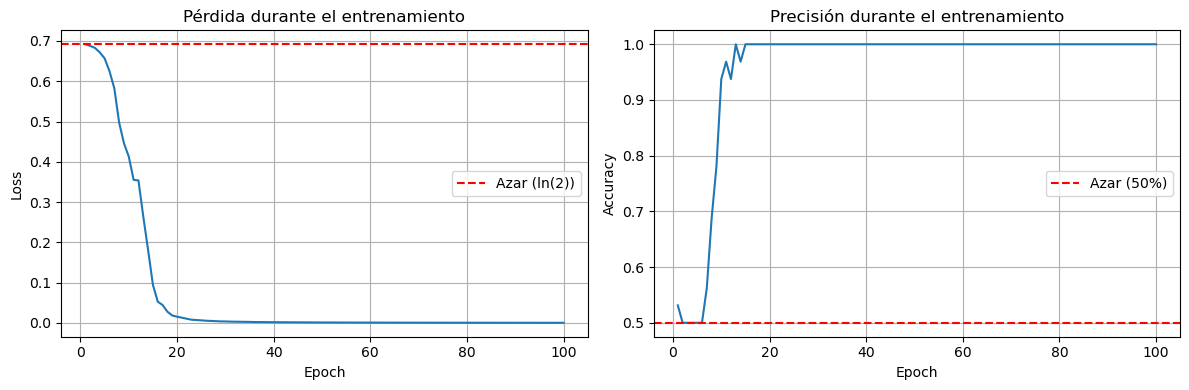

💡 Recomendaciones para mejorar:
1. 📸 Añade más imágenes (mínimo 50 por clase)
2. 🔄 Prueba data augmentation
3. ⚙️  Ajusta learning rate si es necesario
4. 🧠 Considera arquitecturas más simples si tienes pocos datos

🎉 ¡Proceso completado!


In [46]:
if __name__ == "__main__":
    main()